In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
med = pd.read_csv("framingham.csv")
med.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
med.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
med.drop('education',axis=1,inplace=True)

In [6]:
med.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
med.drop('currentSmoker',axis=1,inplace=True)

In [8]:
med.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
med.tail()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


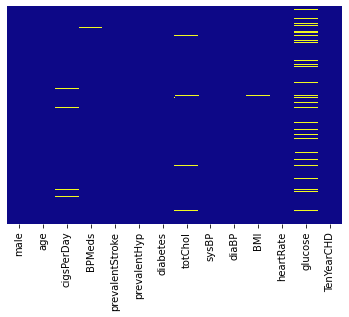

In [10]:
sns.heatmap(med.isna(),yticklabels=False,cbar=False,cmap='plasma')

In [11]:
med['glucose'] = med['glucose'].fillna((med['glucose'].mean()))

In [12]:
med.isna().sum()

male                0
age                 0
cigsPerDay         29
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [13]:
med.dropna(inplace=True)

In [14]:
med.isna().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

In [15]:
med.nunique()

male                  2
age                  39
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             245
sysBP               232
diaBP               145
BMI                1347
heartRate            73
glucose             142
TenYearCHD            2
dtype: int64

In [16]:
med.columns

Index(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [17]:
sfea = ['cigsPerDay','totChol','sysBP', 'diaBP', 'BMI','heartRate', 'glucose']

fig = px.scatter(med,x='age', y=sfea,color='TenYearCHD')
fig.show()

In [18]:
pip install plotly --upgrade

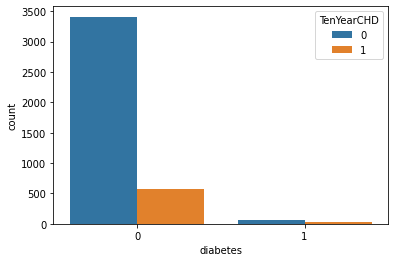

In [19]:
sns.countplot(x='diabetes',hue='TenYearCHD',data=med)

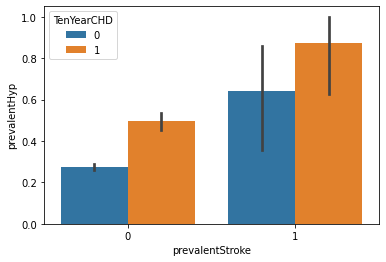

In [37]:
sns.barplot(x='prevalentStroke',y='prevalentHyp',hue='TenYearCHD',data=med)

In [21]:
fig = px.line(med,x='diaBP',y='sysBP',color='TenYearCHD')
fig.show()

In [22]:
fig = px.scatter(med,x='cigsPerDay',y='heartRate',color='TenYearCHD')
fig.show()

In [23]:
fig= px.line(med,x='BMI',y='totChol',color='TenYearCHD')
fig.show()

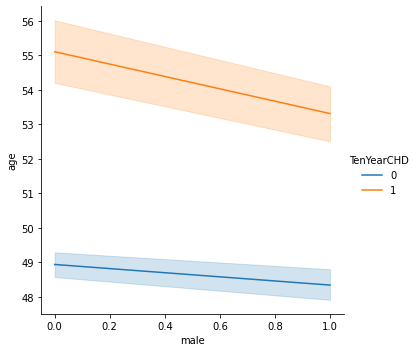

In [24]:
sns.relplot(x='male',y='age',hue='TenYearCHD',data=med,kind='line')

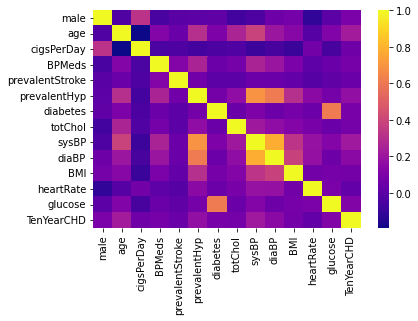

In [25]:
sns.heatmap(med.corr(),cmap='plasma')

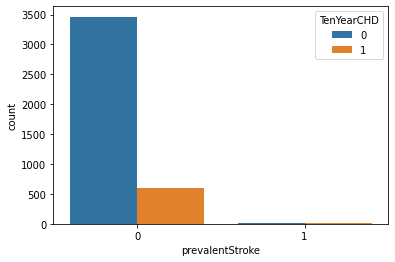

In [26]:
sns.countplot(x='prevalentStroke',hue='TenYearCHD',data=med)

**Training and Testing the model**

**1. Using Logistic regression**


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
lm = LogisticRegression()

In [29]:

X = med[[ 'age', 'prevalentStroke','diabetes', 'totChol']]
y = med['TenYearCHD']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [31]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
pred = lm.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       689
           1       1.00      0.01      0.02       129

    accuracy                           0.84       818
   macro avg       0.92      0.50      0.47       818
weighted avg       0.87      0.84      0.77       818



In [34]:
confusion_matrix(y_test,pred)

array([[689,   0],
       [128,   1]])

In [35]:
print(accuracy_score(y_test,pred))

0.843520782396088


**2. Using Deecision Trees**


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree = DecisionTreeClassifier()

In [40]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
predd = dtree.predict(X_test)

In [43]:
print(classification_report(y_test,predd))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       689
           1       0.22      0.16      0.18       129

    accuracy                           0.78       818
   macro avg       0.53      0.53      0.53       818
weighted avg       0.75      0.78      0.76       818



In [45]:
print(confusion_matrix(y_test,predd))

[[617  72]
 [109  20]]


In [46]:
print(accuracy_score(y_test,predd))

0.7787286063569682


3. Using Random Forests

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(n_estimators=200)

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
predictions = rfc.predict(X_test)

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       689
           1       0.24      0.15      0.18       129

    accuracy                           0.79       818
   macro avg       0.55      0.53      0.53       818
weighted avg       0.75      0.79      0.77       818



In [52]:
print(confusion_matrix(y_test,predictions))

[[629  60]
 [110  19]]
